In [1]:
# Parameters
config = {
    "notebook": "notebooks/data_explorer.ipynb",
    "data_path": "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/fixed_gear.csv",
    "output_label": "fixed_gear",
}


In [2]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv",
    }
print(config)

{'notebook': 'notebooks/data_explorer.ipynb', 'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/fixed_gear.csv', 'output_label': 'fixed_gear'}


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')
print(df.shape)
df.head()

(1559137, 10)


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,7.572519e+12,1.347664e+09,0.0,36054.625000,0.0,0.000000,42.798748,-8.944992,-1.0,gfw
1,7.572519e+12,1.348056e+09,0.0,36054.625000,0.0,0.000000,42.798717,-8.945075,-1.0,gfw
2,7.572519e+12,1.350409e+09,0.0,90970.296875,0.0,198.199997,43.106419,-9.215466,-1.0,gfw
3,7.572519e+12,1.350410e+09,0.0,90970.296875,0.0,186.899994,43.106434,-9.215431,-1.0,gfw
4,7.572519e+12,1.350411e+09,0.0,90970.296875,0.0,190.500000,43.106430,-9.215442,-1.0,gfw


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559137 entries, 0 to 1559136
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   mmsi                 1559137 non-null  float64
 1   timestamp            1559137 non-null  float64
 2   distance_from_shore  1559137 non-null  float64
 3   distance_from_port   1559137 non-null  float64
 4   speed                1559137 non-null  float64
 5   course               1559137 non-null  float64
 6   lat                  1559137 non-null  float64
 7   lon                  1559137 non-null  float64
 8   is_fishing           1559137 non-null  float64
 9   source               1559137 non-null  object 
dtypes: float64(9), object(1)
memory usage: 119.0+ MB
None


In [5]:
df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,1.559137e+06,1.559137e+06,1.559137e+06,1.559137e+06,1.559137e+06,1.559137e+06,1.559137e+06,1.559137e+06,1.559137e+06
mean,1.530752e+14,1.421486e+09,3.761878e+04,5.989848e+04,2.227195e+00,1.877938e+02,5.095086e+01,1.274018e+00,-9.659100e-01
std,8.976383e+13,3.782830e+07,1.090188e+05,1.269729e+05,3.412790e+00,1.177506e+02,5.894565e+00,8.512244e+00,2.173124e-01
min,7.572519e+12,1.325625e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.326460e+01,-1.792441e+02,-1.000000e+00
25%,8.878018e+13,1.387594e+09,0.000000e+00,5.656715e+03,0.000000e+00,7.740000e+01,4.745566e+01,-3.909275e+00,-1.000000e+00
50%,1.305289e+14,1.427254e+09,0.000000e+00,2.690659e+04,1.000000e-01,2.055000e+02,5.050242e+01,-2.333808e+00,-1.000000e+00
75%,2.616830e+14,1.455255e+09,3.413126e+04,5.514391e+04,3.800000e+00,2.870000e+02,5.602126e+01,8.220293e+00,-1.000000e+00
max,2.802913e+14,1.480032e+09,3.099833e+06,1.181676e+07,1.023000e+02,5.110000e+02,8.479108e+01,1.709277e+02,1.000000e+00


In [6]:
df["is_fishing"].value_counts()

-1.000000    1517279
 0.000000      29790
 1.000000      10665
 0.666667        538
 0.250000        423
 0.333333        405
 0.800000         29
 0.750000          6
 0.400000          2
Name: is_fishing, dtype: int64

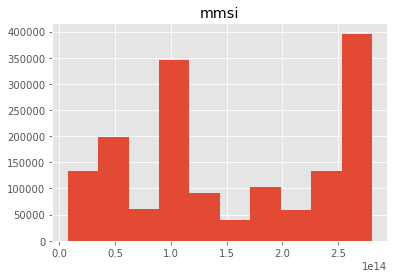

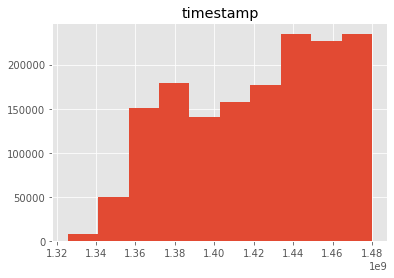

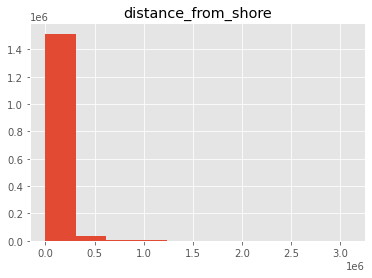

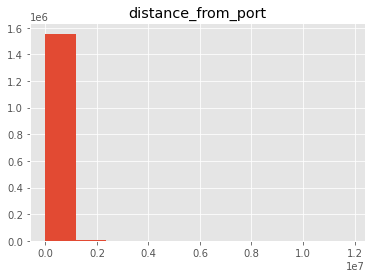

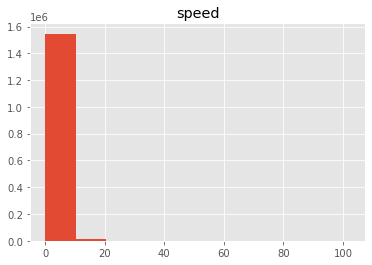

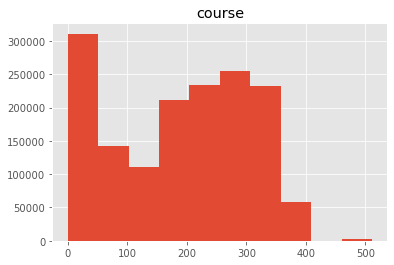

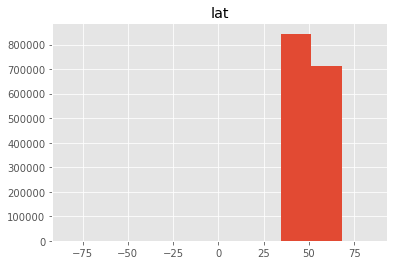

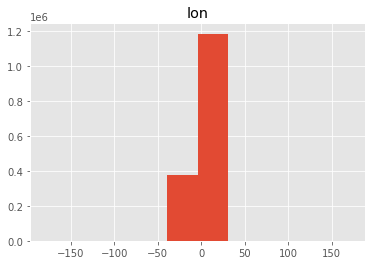

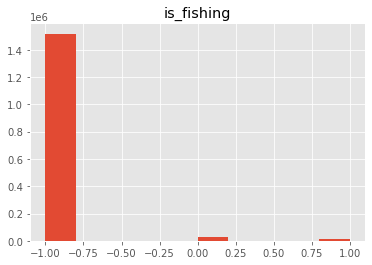

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline    
plt.style.use('ggplot')

for col in df._get_numeric_data().columns:
    ax = df[col].hist()
    ax.set_title(col)
    plt.show()


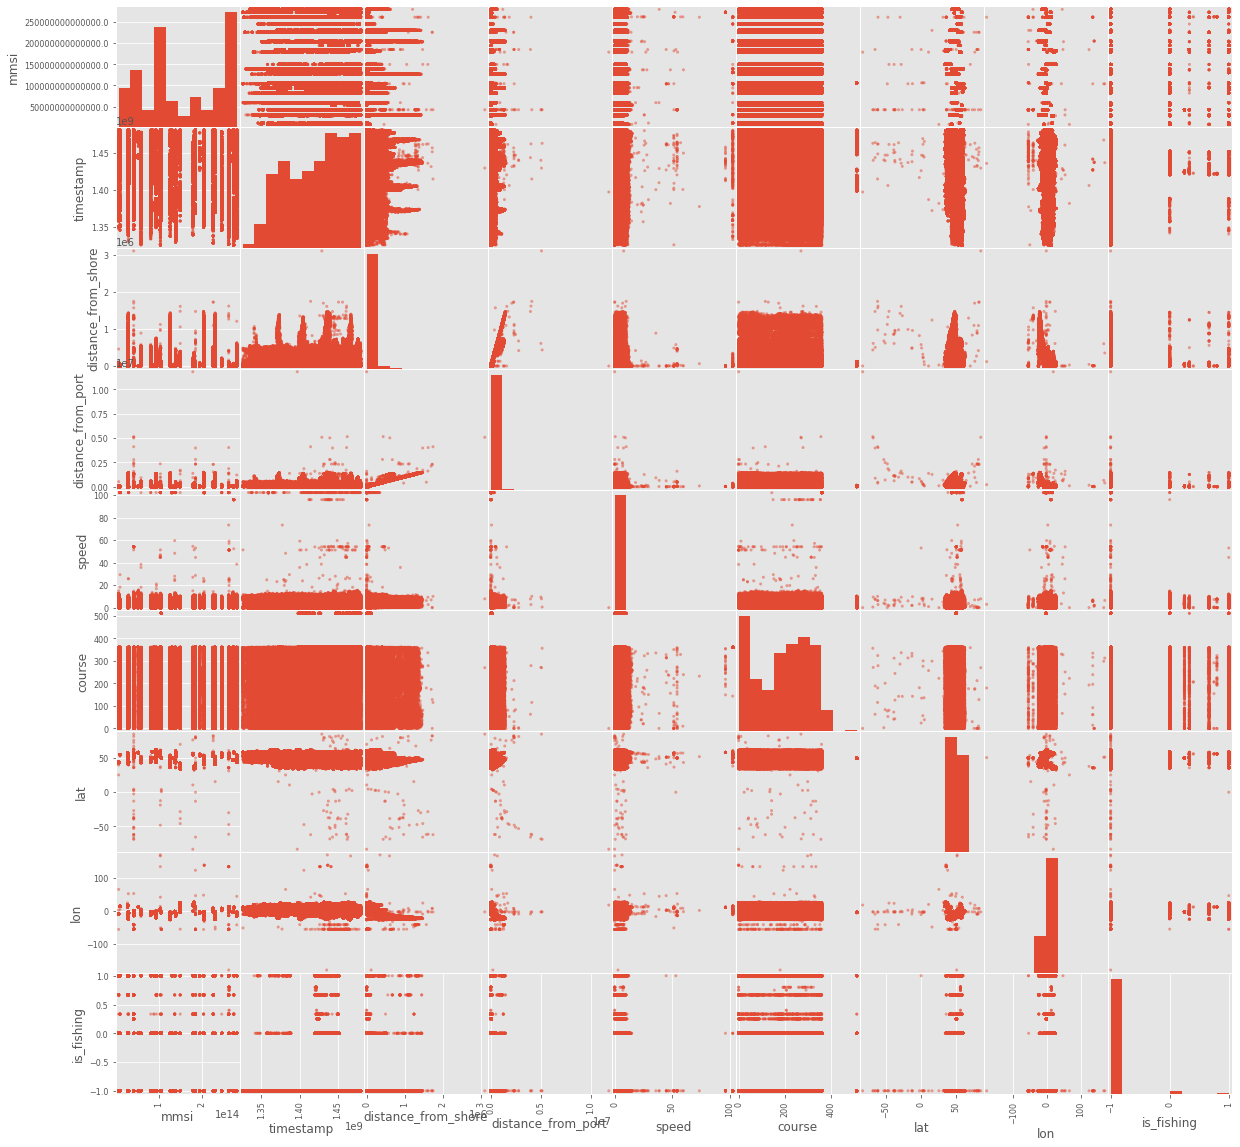

In [8]:
ax = pd.plotting.scatter_matrix(df._get_numeric_data(),figsize=(20,20))
plt.show()


In [9]:
df["is_fishing"].value_counts(normalize=True)

-1.000000    0.973153
 0.000000    0.019107
 1.000000    0.006840
 0.666667    0.000345
 0.250000    0.000271
 0.333333    0.000260
 0.800000    0.000019
 0.750000    0.000004
 0.400000    0.000001
Name: is_fishing, dtype: float64

¿Cual es el valor promedio de los buques que estan pescando?

In [10]:
df[df["is_fishing"] == 1].mean()

mmsi                   1.305892e+14
timestamp              1.430469e+09
distance_from_shore    5.314115e+04
distance_from_port     7.336591e+04
speed                  3.508345e+00
course                 1.795927e+02
lat                    4.854390e+01
lon                    6.495441e-01
is_fishing             1.000000e+00
dtype: float64

In [11]:
#Nos quedamos con los puntos que estan mayor a 3 millas nauticas de la costa.
df = df[(df['distance_from_shore'] >= 5556)]

#Nos quedamos solamente con los valores que estamos seguros que esta o no esta pescando.
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')

Observamos la velocidad promedio separado por cuando esta o no esta pescando.

In [12]:
columns_to_show = ["speed"]

for column in columns_to_show:
    print('#########')
    print(df.groupby(["is_fishing"])[[column]].describe(percentiles=[]))


#########


               speed                                          
               count      mean       std  min  50%         max
is_fishing                                                    
NO          617965.0  4.520053  3.276221  0.0  3.9  102.300003
SI            8190.0  3.913370  2.984441  0.0  3.2   53.000000


In [13]:
df['mmsi'].value_counts().sort_index(ascending=False)

2.802913e+14     22377
2.733520e+14     13309
2.716485e+14      4017
2.625227e+14      7214
2.616830e+14     63176
2.455585e+14     20512
2.304529e+14      8903
2.259868e+14     13365
2.051986e+14     11427
2.036858e+14      7155
1.947164e+14      1826
1.850797e+14     19440
1.849220e+14     22846
1.817929e+14      5022
1.788590e+14     17762
1.497320e+14     34800
1.390287e+14     18590
1.369291e+14      4776
1.305289e+14     19446
1.266057e+14      8904
1.061505e+14     51214
1.040818e+14     21893
1.037866e+14      8521
9.474548e+13       640
9.400902e+13     20543
8.878018e+13      7365
8.502277e+13       234
8.165376e+13      8112
5.911250e+13      5731
4.231421e+13    116037
3.058181e+13      1540
3.005494e+13     20105
2.814426e+13      5206
1.075939e+13     10487
7.572519e+12     23660
Name: mmsi, dtype: int64

In [14]:
df.groupby('mmsi')['is_fishing'].value_counts(normalize=True).unstack().sort_values(by='mmsi', ascending=False)

is_fishing,NO,SI
mmsi,,
2.802913e+14,0.991330,0.008670
2.733520e+14,0.999624,0.000376
2.716485e+14,0.999751,0.000249
2.625227e+14,0.997643,0.002357
2.616830e+14,0.990598,0.009402
2.455585e+14,0.999805,0.000195
2.304529e+14,0.999551,0.000449
2.259868e+14,0.973363,0.026637
2.051986e+14,0.999737,0.000263
